## Table of Contents

### 01 Importing Visualization Libraries and Data
### 02 Exploring Relationships
- 2.1 Correlation Matrix and Heatmap  
- 2.2 Scatter Plot  
- 2.3 Pair Plot  
- 2.4 Categorical Plots  

### 03 Revisiting and Answering Questions 
### 04 Additional Exploratory Analysis 

## 01 Importing Visualization Libraries and Data

In [1]:
# Importing libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.3.4'

In [3]:
# Making sure charts are displayed without needing to call them

%matplotlib inline

In [4]:
# Create a project folder string

path = r'/Users/nora/Desktop/CareerFoundry Achievement 6'

In [5]:
# Import the data set

df_clean = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'airbnb_clean.csv'))

In [6]:
df_clean.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,no_reviews
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,False
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,False
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,True
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,False
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,False


In [7]:
df_clean = df_clean.drop('Unnamed: 0', 1)

## 02 Exploring Relationships

### 2.1 Correlation Matrix and Heatmap

In [8]:
# Create a correlation matrix using pandas

df_clean.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,no_reviews
id,1.000000,0.588273,-0.003139,0.090930,0.010624,-0.013217,-0.319870,0.295064,0.133272,0.085435,0.164801
host_id,0.588273,1.000000,0.020200,0.127098,0.015320,-0.017352,-0.140263,0.298840,0.154956,0.203442,0.084571
latitude,-0.003139,0.020200,1.000000,0.084798,0.033941,0.024873,-0.015424,-0.010798,0.019517,-0.011000,0.029393
longitude,0.090930,0.127098,0.084798,1.000000,-0.150024,-0.062752,0.059147,0.148872,-0.114713,0.082755,-0.043514
price,0.010624,0.015320,0.033941,-0.150024,1.000000,0.042798,-0.047945,-0.030883,0.057472,0.081837,0.085149
minimum_nights,-0.013217,-0.017352,0.024873,-0.062752,0.042798,1.000000,-0.080105,-0.123305,0.127960,0.144315,0.111357
number_of_reviews,-0.319870,-0.140263,-0.015424,0.059147,-0.047945,-0.080105,1.000000,0.555948,-0.072386,0.171961,-0.265761
reviews_per_month,0.295064,0.298840,-0.010798,0.148872,-0.030883,-0.123305,0.555948,1.000000,-0.009694,0.187360,NaN
calculated_host_listings_count,0.133272,0.154956,0.019517,-0.114713,0.057472,0.127960,-0.072386,-0.009694,1.000000,0.225704,0.118089
availability_365,0.085435,0.203442,-0.011000,0.082755,0.081837,0.144315,0.171961,0.187360,0.225704,1.000000,-0.031373


In [9]:
df_clean.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'no_reviews'],
      dtype='object')

In [10]:
# Create a subset excluding id and host_id

sub = df_clean[['latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

In [11]:
sub

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48889,40.67853,-73.94995,70,2,0,NaN,2,9
48890,40.70184,-73.93317,40,4,0,NaN,2,36
48891,40.81475,-73.94867,115,10,0,NaN,1,27
48892,40.75751,-73.99112,55,1,0,NaN,6,2


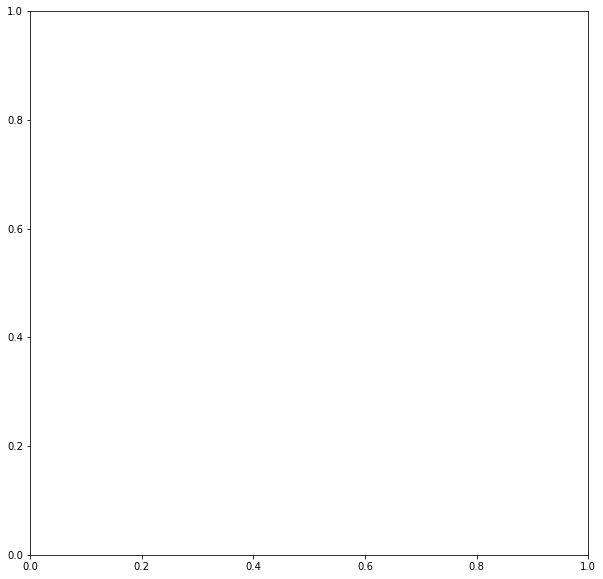

In [12]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(10,10))

In [13]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

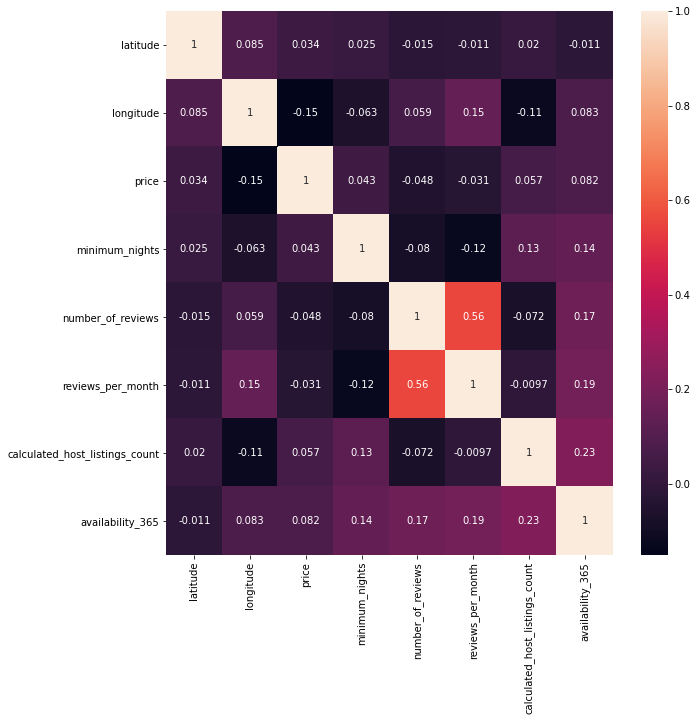

In [14]:
corr.figure

In [15]:
# Saving visualizations

corr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'correlations.png'))


Surprisingly, there are not many strong and moderate relationships between the variables. 

#### - Strong relationships: 
###### number_of_reviews and reviews_per_month  
This relationship is unsurpring and does not provide much insight since the variables are very similar. 

#### - Moderate relationships: 
There are no moderate relationships between the variables. 

#### - Weak positive relationships: 
###### availability_365 and calculated_host_listings_count  
Hosts who rent out an apartment all the time are more likely to use Airbnb as a business model and rent out multiple apartments. On the other hand, people who rent out their apartment while they are on holidays have a low availabilty. They are more likely to have only one listing because they rent out the apartment they usually live in.  
###### availability_365 and reviews_per_month, number_of_reviews   
Availabilty_365 had a weak positive correlation with the vaiables reviews_per_month and number_of_reviews because the higher the availability, the more customers can book the listing and leave a review. 
###### availability_365 and minimum_nights  
Hosts who rent out aparments perminantely are more likely to have a higher minimum_hights policy because they can rent out apartments for longer periods of times than people who rent out their apartments when they are on holiday.
###### longitude and reviews_per_month    
Listings in good locations get more guests and therefore more reviews. 
###### minimum_nights and calculated_host_listings_count    
This also has to do with hosts renting out apartments as a business. Hosts who rent out apartments as a business are more likely to have multiple listings and a higher setting for minimum nights. 

#### - Weak negative relationships
###### longitude and price   
There is a weak relationship between the location and the price of a lisiting. The direction of the relationship does not matter in this case because of the longitude variable.
###### minimum_nights and reviews_per_month  
This relationship is unsurprising. The higher the minimum_nights, the longer individual customers stay which results in fewer reviews.

### 2.2 Scatter Plot

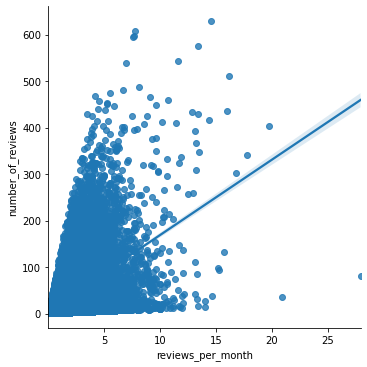

In [16]:
# Create a scatterplot for the "number_of_reviews" and "reviews_per_month" columns in seaborn

sns.lmplot(x = 'reviews_per_month', y = 'number_of_reviews', data = df_clean)

There is a moderate positive relationship between these variables but it might be simply due to the fact that if a listing has 0 reviews it also has 0 reviews_per_month. The relationship between these variable is not informative at all because they both are a measurement for reviews. 

### 2.3 Pair Plot

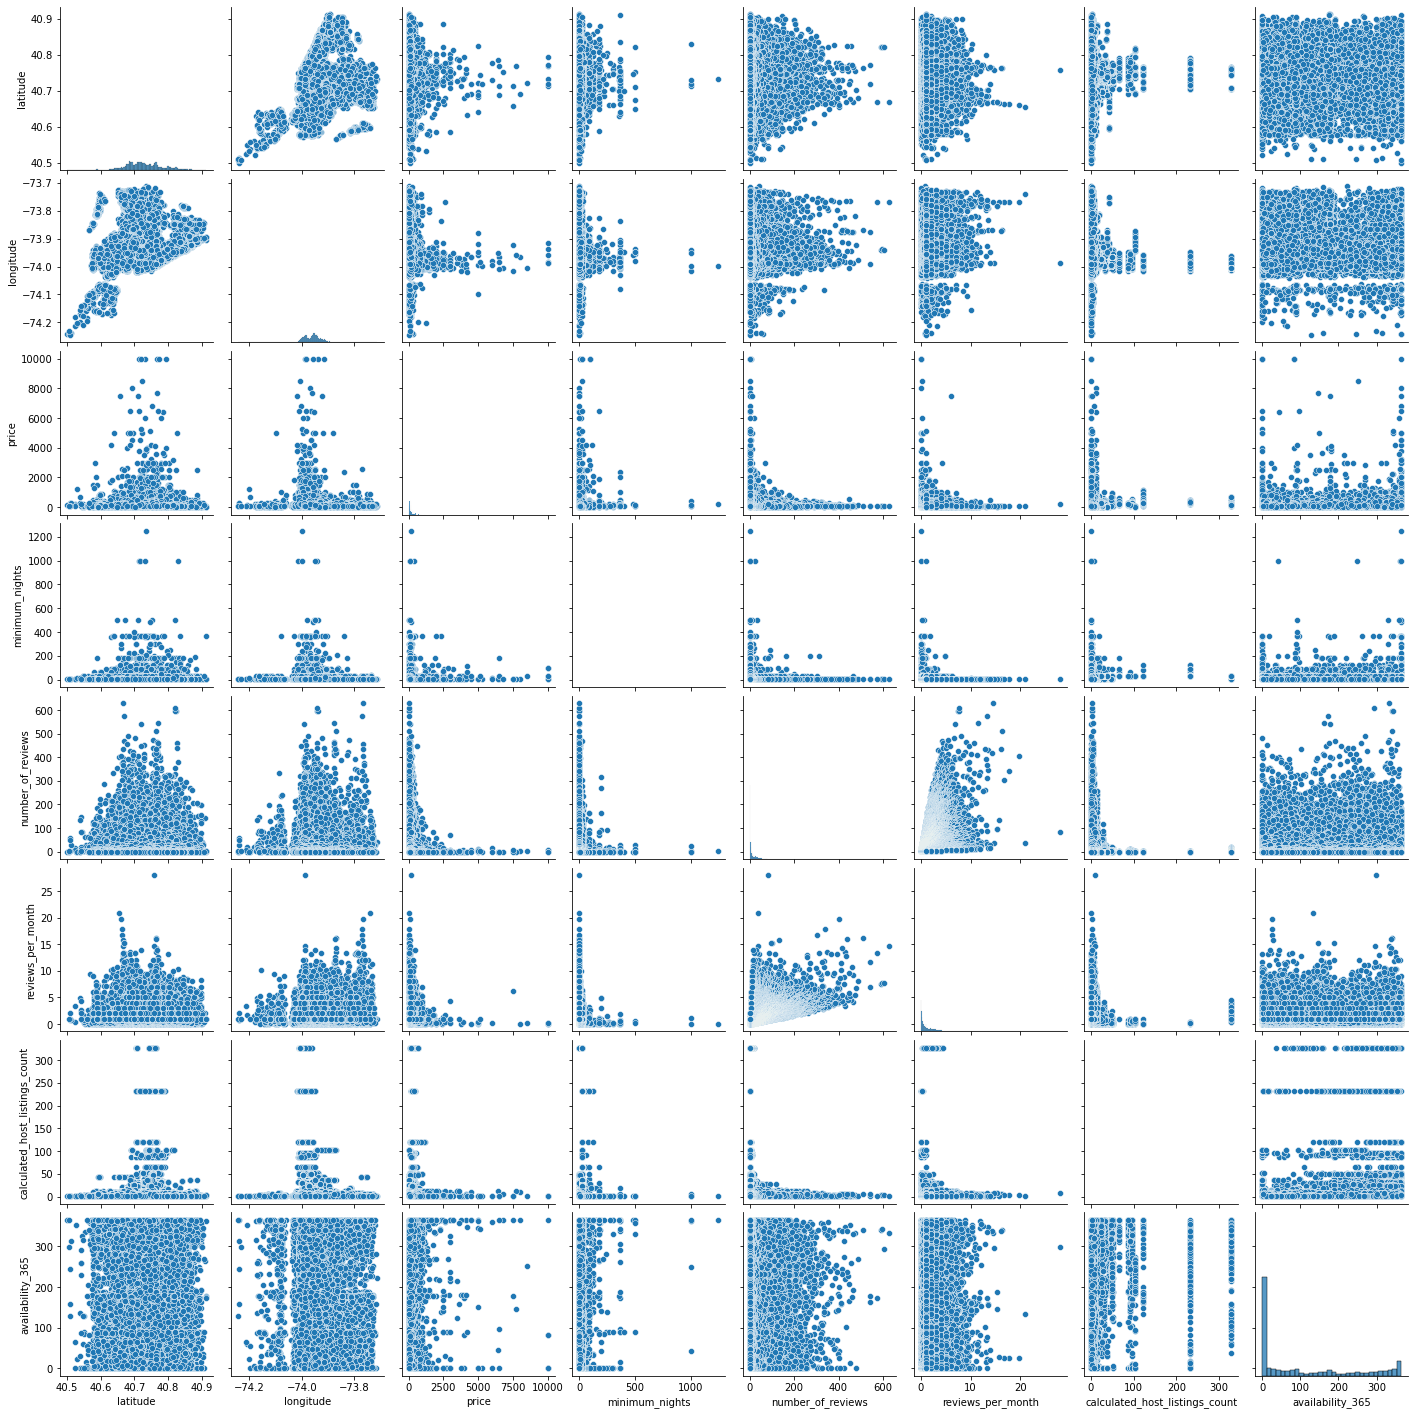

In [17]:
# Create a pair plot 

g = sns.pairplot(sub)

In [19]:
# Saving visualization

g.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pairplot.png'))

Some of the scatterplots are hard to interpret. 

- Listings with a low minimum_nights setting have a higher number of reviews and tend to have higher prices
- Listings with a low price have a higher number of reviews 
- Location (latitude and longitude) play a role in the number of reviews, price and minimum_nights 

Variables to explore further: 
- location
- price
- number of reviews

### 2.4 Categorical Plots

<AxesSubplot:xlabel='price', ylabel='Count'>

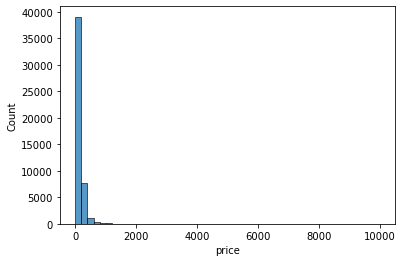

In [18]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(df_clean['price'], bins = 50) # used histplot indead of distplot function

# This plot is hard to interpret since most prices are below 100 dollars but prices go up to 10.000 (outliers)

In [19]:
# Creating a subset without outliers to identify price ranges 

subset = df_clean[df_clean['price']<= 1000]

<AxesSubplot:xlabel='price', ylabel='Count'>

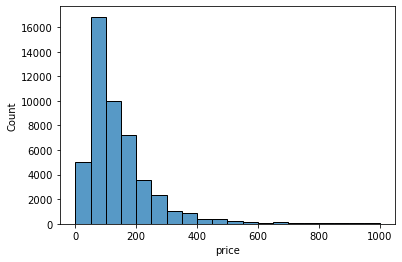

In [20]:
# Creating a histogram with subset to visualize the distribution of the variables. 

sns.histplot(subset['price'], bins = 20)

In [21]:
# Defining price conditions with loc function 

df_clean.loc[df_clean['price'] < 50, 'price_category'] = 'Low price'
df_clean.loc[(df_clean['price'] >= 50) & (df_clean['price'] < 200), 'price_category'] = 'Middle price'
df_clean.loc[df_clean['price'] >= 200, 'price_category'] = 'High price'

In [22]:
# Checking new column 

df_clean['price_category'].value_counts(dropna = False)

Middle price    34082
High price       9785
Low price        5027
Name: price_category, dtype: int64

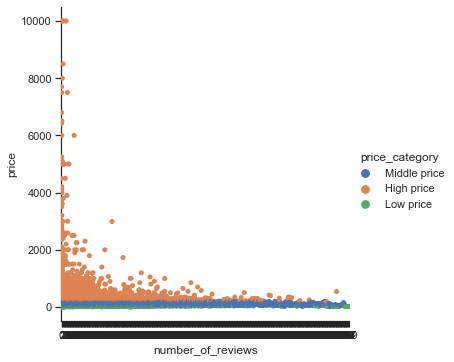

In [23]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="number_of_reviews", y="price", hue="price_category", data=df_clean)

Cheap apartments have a higher number of reviews because they get booked more frequently.

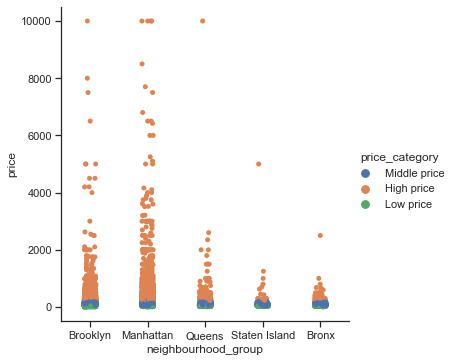

In [24]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="neighbourhood_group", y="price", hue="price_category", data=df_clean)

Manhattan has the most expensice prices followed by Brooklyn. 

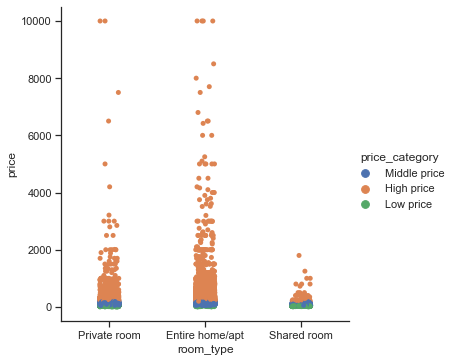

In [25]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="room_type", y="price", hue="price_category", data=df_clean)

Entire apartments are most expensive followed by private rooms. 

## 03 Revisiting and Answering Questions

Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

Questions:
1. How many listings are in each neighbourhood and where are they?  
2. What is the price difference between neighbourhoods?  
3. Which hosts are most popular and why?  
4. How much do hosts earn each month? (I might discard this question, I think I cannot answer it based on this data)  
5. Which hosts are running a business with multiple listings and where are they?  
6. What can we learn about different hosts and areas?  
7. Can we make predictions about price based on certain variables (e.g. location, reviews, etc)?  

I am not able to fully answer any of the questions based on my analysis so far. Regarding question 2, I was able to see that Manhattan is the most expensive neighbourhood followed by Brooklyn. I do not have any new questions at this point. 

Define any hypotheses that you can at this point. You’ll be testing these later on.    

Preliminary Hypotheses:
1. Mannhattan is the most popular neighbourhood with the highest number of listings.
2. Hosts with multiple listings have apartments in the most popular neighbourhoods.  
3. The price of a listing depends on the location and apartment_type.

## 04 Additional Exploratory Analysis

### How many listings are in each neighbourhood?

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Manhattan'),
  Text(1, 0, 'Brooklyn'),
  Text(2, 0, 'Queens'),
  Text(3, 0, 'Bronx'),
  Text(4, 0, 'Staten Island')])

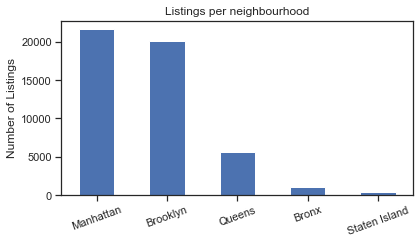

In [26]:
listings_bar = df_clean['neighbourhood_group'].value_counts().plot.bar()
plt.title('Listings per neighbourhood')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.xticks(rotation= 20, horizontalalignment="center")

In [27]:
# Export figure 

listings_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'listings_bar.png'))

#### Manhattan has over 20,000 listings followed by Brooklyn, which has just below 20,000 listings. 

### What is the price difference between neighbourhoods? 

In [28]:
# What is the price difference between neighbourhoods? 

# Mean price by neighbourhood_group

df_clean.groupby('neighbourhood_group').agg({'price': ['mean', 'min', 'max']})

price           
                           mean min    max
neighbourhood_group                       
Bronx                 87.496792   0   2500
Brooklyn             124.383207   0  10000
Manhattan            196.880286   0  10000
Queens                99.517649  10  10000
Staten Island        114.812332  13   5000

Text(0.5, 1.0, 'Price By Neighbourhood Boxplots')

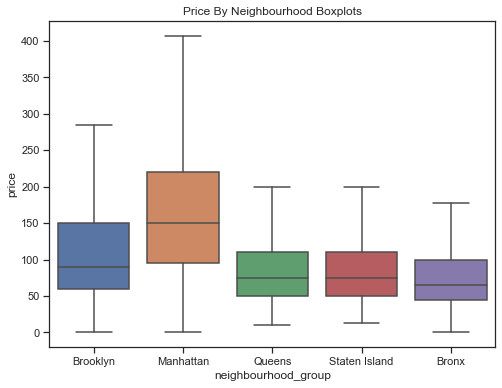

In [29]:
# Boxplot for price per neighbourhood_group

plt.figure(figsize=(8,6))
boxplot_price = sns.boxplot(data=df_clean, x='neighbourhood_group', y='price', showfliers=False)
plt.title('Price By Neighbourhood Boxplots')

In [30]:
# Export figure 

boxplot_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'boxplot_price.png'))

#### Manhattan is the most expensive neighbourhood followed by Brooklyn. 

### Which hosts have multiple listings?

In [31]:
# Get values for calculated_host_listings_count column

df_clean['calculated_host_listings_count'].value_counts().sort_index()

1      32303
2       6658
3       2853
4       1440
5        845
6        570
7        399
8        416
9        233
10       210
11       110
12       180
13       130
14        70
15        75
16        16
17        68
18        54
19        19
20        40
21        21
23        69
25        50
26        26
27        27
28        56
29        29
30        30
31        62
32        32
33        99
34        68
37        37
39        39
43        43
47        47
49        98
50        50
52       104
65        65
87        87
91        91
96       192
103      103
121      121
232      232
327      327
Name: calculated_host_listings_count, dtype: int64

<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='Count'>

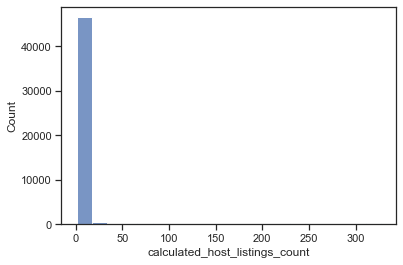

In [32]:
# Use a histogram to visualize the distribution of the variable

sns.histplot(df_clean['calculated_host_listings_count'], bins = 20)

In [33]:
# Group data by host_id 

top_hosts = df_clean.groupby(['host_id','host_name']).agg({'id': 'count'})
top_hosts.rename(columns = {'id' : 'listings_count'}, inplace = True)

In [34]:
# Sort data by listings_count from highest to lowest 

top_hosts = top_hosts.sort_values(by=['listings_count'],ascending=False)
top_hosts = top_hosts.head(10)
top_hosts

,,listings_count
host_id,host_name,
219517861,Sonder (NYC),327
107434423,Blueground,232
30283594,Kara,121
137358866,Kazuya,103
12243051,Sonder,96
16098958,Jeremy & Laura,96
61391963,Corporate Housing,91
22541573,Ken,87
200380610,Pranjal,65


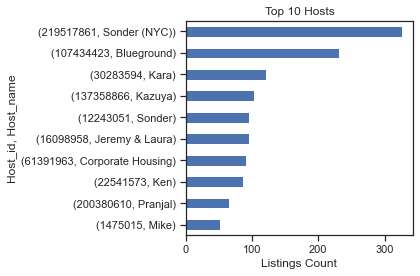

In [35]:
# Create horizontal bar chart to show top hosts (in terms of listing count)

neighbourhood_price = top_hosts.plot.barh(legend=False)
plt.ylabel('Host_id, Host_name')
plt.xlabel('Listings Count')
plt.title('Top 10 Hosts')
plt.gca().invert_yaxis()
plt.tight_layout()
#plt.style.use('ggplot')

In [36]:
# Export figure 

neighbourhood_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'neighbourhood_price.png'))

#### Most hosts have 1 listing, however the top 10 hosts in have between 52 and 327 listings.

### Which are the most popular neighbourhoods? 

In [37]:
# Group data by neighbourhood

neighbourhoods = df_clean.groupby(['neighbourhood']).agg({'id': 'count'})
neighbourhoods.rename(columns = {'id' : 'listings_count'}, inplace = True)

In [38]:
# Sort data by listings_count from highest to lowest

neighbourhoods = neighbourhoods.sort_values(by=['listings_count'],ascending=False)
neighbourhoods.head(10)

,listings_count
neighbourhood,
Williamsburg,3920
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1971
Hell's Kitchen,1958
East Village,1853
Upper East Side,1798
Crown Heights,1564


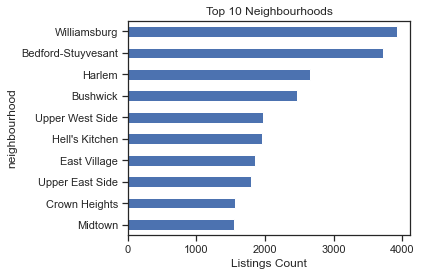

In [39]:
# Create horizontal bar chart to show top 10 neighbourhoods (in terms of listing count)

top_neighbourhoods_bar = neighbourhoods.head(10).plot.barh(legend=False)
plt.xlabel('Listings Count')
plt.title('Top 10 Neighbourhoods')
plt.gca().invert_yaxis()
plt.tight_layout()

In [40]:
# Export figure 

top_neighbourhoods_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top_neighbourhoods_bar.png'))

#### Williamsburg is the neighourhood with the most listings, followed by Bedford-Stuyvesant and Harlem.